In [1]:
import numpy as np
import pandas as pd

### Fashion mnist dataset
* 6만개 학습용 데이터, 1만개 테스트용 데이터(grayscale image array)

In [2]:
from tensorflow.keras.datasets import fashion_mnist, mnist

# 데이터가 train_images에 들어감
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 28x28 grayscale 2차원 데이터
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

4422102/4422102 [==============================] - 1s 0us/step
train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


Text(0.5, 1.0, '9')

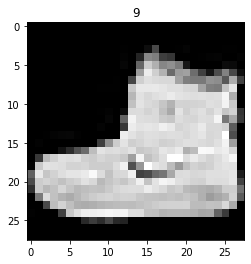

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [4]:
train_images[0, :, :], train_labels[0] # images[0, :, :] 픽셀 하나 하나 찍어라 

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

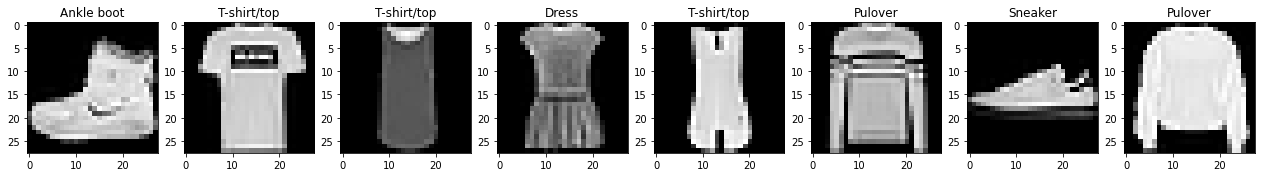

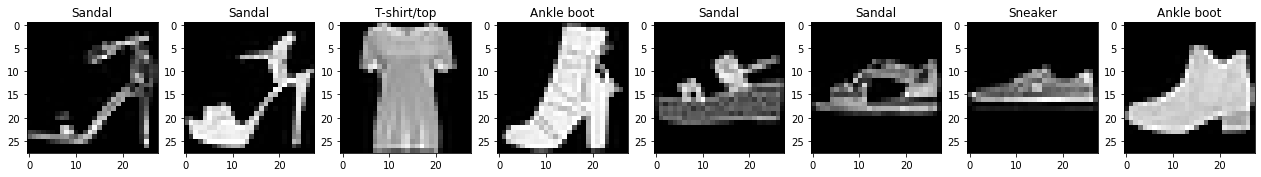

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pulover', 'Dress', 'Coat','Sandal', \
              'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images,labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])

show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### 1.1 Dense Layer를 기반으로 모델을 생성

<img src="./images/a.JPG">

In [19]:
# 소프트맥스 다중분류, 확률값으로 예측

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),  #Flatten 1차원 넘기는 역할
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

# (None,  개수, 데이터 뭐가 올지 모름

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 30)                3030      
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


### 1.2 모델 학습

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy']) # 다중분류

In [26]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)   # y값도 원핫인코딩으로 처리

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [27]:
train_images.shape

(60000, 28, 28)

In [28]:
# vervose = 0 : 수행 내용 출력 안함, 1: 자세히 출력함, 2: 축약된 정보 출력함
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2008 - accuracy: 0.3634
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2520 - accuracy: 0.5123
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8773 - accuracy: 0.6642
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7284 - accuracy: 0.7089
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6181 - accuracy: 0.7489
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5565 - accuracy: 0.7835
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5052 - accuracy: 0.8117
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4795 - accuracy: 0.8209
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4560 - accuracy: 0.8251
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.459

In [29]:
history.history

{'loss': [2.2007763385772705,
  1.252017617225647,
  0.8773297071456909,
  0.7283778786659241,
  0.6181082725524902,
  0.5565474033355713,
  0.505216121673584,
  0.4794514775276184,
  0.4559575617313385,
  0.45913222432136536,
  0.4409404695034027,
  0.4316483736038208,
  0.4016641676425934,
  0.3924245536327362,
  0.37760546803474426,
  0.37097474932670593,
  0.36210665106773376,
  0.35902416706085205,
  0.34859657287597656,
  0.33966562151908875],
 'accuracy': [0.36340001225471497,
  0.5122500061988831,
  0.6641666889190674,
  0.7089499831199646,
  0.7488999962806702,
  0.7835333347320557,
  0.8116666674613953,
  0.820900022983551,
  0.825083315372467,
  0.8272833228111267,
  0.831933319568634,
  0.8393999934196472,
  0.861549973487854,
  0.8636666536331177,
  0.8682000041007996,
  0.8726333379745483,
  0.8746166825294495,
  0.8766666650772095,
  0.880216658115387,
  0.8821333050727844]}

In [32]:
print(history.history['loss'])
print('\n')
print(history.history['accuracy'])

[2.2007763385772705, 1.252017617225647, 0.8773297071456909, 0.7283778786659241, 0.6181082725524902, 0.5565474033355713, 0.505216121673584, 0.4794514775276184, 0.4559575617313385, 0.45913222432136536, 0.4409404695034027, 0.4316483736038208, 0.4016641676425934, 0.3924245536327362, 0.37760546803474426, 0.37097474932670593, 0.36210665106773376, 0.35902416706085205, 0.34859657287597656, 0.33966562151908875]


[0.36340001225471497, 0.5122500061988831, 0.6641666889190674, 0.7089499831199646, 0.7488999962806702, 0.7835333347320557, 0.8116666674613953, 0.820900022983551, 0.825083315372467, 0.8272833228111267, 0.831933319568634, 0.8393999934196472, 0.861549973487854, 0.8636666536331177, 0.8682000041007996, 0.8726333379745483, 0.8746166825294495, 0.8766666650772095, 0.880216658115387, 0.8821333050727844]


### 1.3 예측

In [33]:
test_images.shape

(10000, 28, 28)

In [34]:
# 테스트 image 10000개 , 결과가 10차원-> 모델 선언이 softmax 라서

pred_proba = model.predict(test_images)
print(pred_proba.shape)

313/313 [==============================] - 0s 721us/step
(10000, 10)


In [35]:
pred_proba[0]  # 확률 가장 큰 애가 9.9139225e-01

array([3.3055648e-11, 2.0799121e-15, 4.8203857e-19, 4.4675149e-16,
       6.3779463e-17, 4.3750030e-04, 1.0462149e-18, 8.1560202e-03,
       1.4215312e-05, 9.9139225e-01], dtype=float32)

In [36]:
pred_proba[0].sum()

1.0

In [37]:
pred_proba[0].argmax() # 제일 큰값이 뭐냐

9

In [38]:
#predict 입력값으로 2차원을 넣으면 오류 날 수 있음, 3차원으로 만들어 주는게 좋음

pred_proba = model.predict(test_images[0]) # 1차원, 안정화 될때까지 3차원을 넣어줘라

1/1 [==============================] - 0s 315ms/step


In [39]:
test_images[0].shape

(28, 28)

In [40]:
np.expand_dims(test_images[0], axis=0).shape # 하나가 늘어남, 2차원이 3차원으로 나옴

(1, 28, 28)

In [41]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0)) # 차원을 늘려서 넣어주는게 좋다
print('sofomax output:', pred_proba) 

# 리턴값 2개값 나옴, 어쩔 수 없음 여기서 그렇게 만들어주니깐 그래서 우리가 처리해야함

1/1 [==============================] - 0s 23ms/step
sofomax output: [[3.3055777e-11 2.0799121e-15 4.8203857e-19 4.4675323e-16 6.3779702e-17
  4.3750030e-04 1.0462190e-18 8.1560202e-03 1.4215365e-05 9.9139225e-01]]


In [42]:
np.squeeze(pred_proba) # 스키쥐로 꽉 자서 필요없는 차원을 날려버림

array([3.3055777e-11, 2.0799121e-15, 4.8203857e-19, 4.4675323e-16,
       6.3779702e-17, 4.3750030e-04, 1.0462190e-18, 8.1560202e-03,
       1.4215365e-05, 9.9139225e-01], dtype=float32)

In [43]:
len(pred_proba[0])

10

In [44]:
(pred_proba[0]) # 6만개 중에 첫번째

array([3.3055777e-11, 2.0799121e-15, 4.8203857e-19, 4.4675323e-16,
       6.3779702e-17, 4.3750030e-04, 1.0462190e-18, 8.1560202e-03,
       1.4215365e-05, 9.9139225e-01], dtype=float32)

In [45]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 0s 939us/step - loss: 0.4583 - accuracy: 0.8575


[0.4583319425582886, 0.8575000166893005]

### 1.4 검증 데이터 세트를 이용한 학습 수행

In [46]:
# 숫자값이 너무커서 0,1로 줄여줌 트레이닝이 수월해짐

import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [49]:
train_images[30]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [51]:
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [52]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, \
                                                                test_size=0.15, random_state=2021)
print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, \
                              val_labels.shape)
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)
print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

train과 validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)
after OHE: (51000, 10) (9000, 10)


In [53]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
INPUT_SIZE = 28
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, \
                   validation_data=(val_images, val_oh_labels), epochs=20, verbose=1)

Epoch 1/20
399/399 [==============================] - 1s 2ms/step - loss: 1.4884 - accuracy: 0.4946 - val_loss: 0.9788 - val_accuracy: 0.6381
Epoch 2/20
399/399 [==============================] - 1s 2ms/step - loss: 0.8328 - accuracy: 0.6983 - val_loss: 0.7546 - val_accuracy: 0.7276
Epoch 3/20
399/399 [==============================] - 1s 2ms/step - loss: 0.6898 - accuracy: 0.7481 - val_loss: 0.6650 - val_accuracy: 0.7607
Epoch 4/20
399/399 [==============================] - 1s 2ms/step - loss: 0.6228 - accuracy: 0.7739 - val_loss: 0.6174 - val_accuracy: 0.7692
Epoch 5/20
399/399 [==============================] - 1s 2ms/step - loss: 0.5864 - accuracy: 0.7871 - val_loss: 0.5903 - val_accuracy: 0.7803
Epoch 6/20
399/399 [==============================] - 1s 2ms/step - loss: 0.5627 - accuracy: 0.7972 - val_loss: 0.5665 - val_accuracy: 0.7997
Epoch 7/20
399/399 [==============================] - 1s 2ms/step - loss: 0.5421 - accuracy: 0.8056 - val_loss: 0.5480 - val_accuracy: 0.8026
Epoch 

In [55]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, \
                    validation_data=(val_images, val_oh_labels), epochs=20, verbose=1)

Epoch 1/20
399/399 [==============================] - 1s 2ms/step - loss: 0.4298 - accuracy: 0.8495 - val_loss: 0.4493 - val_accuracy: 0.8424
Epoch 2/20
399/399 [==============================] - 1s 2ms/step - loss: 0.4256 - accuracy: 0.8508 - val_loss: 0.4462 - val_accuracy: 0.8444
Epoch 3/20
399/399 [==============================] - 1s 2ms/step - loss: 0.4217 - accuracy: 0.8526 - val_loss: 0.4462 - val_accuracy: 0.8432
Epoch 4/20
399/399 [==============================] - 1s 2ms/step - loss: 0.4171 - accuracy: 0.8528 - val_loss: 0.4387 - val_accuracy: 0.8452
Epoch 5/20
399/399 [==============================] - 1s 2ms/step - loss: 0.4136 - accuracy: 0.8554 - val_loss: 0.4394 - val_accuracy: 0.8439
Epoch 6/20
399/399 [==============================] - 1s 2ms/step - loss: 0.4099 - accuracy: 0.8556 - val_loss: 0.4338 - val_accuracy: 0.8478
Epoch 7/20
399/399 [==============================] - 1s 2ms/step - loss: 0.4065 - accuracy: 0.8562 - val_loss: 0.4283 - val_accuracy: 0.8479
Epoch 

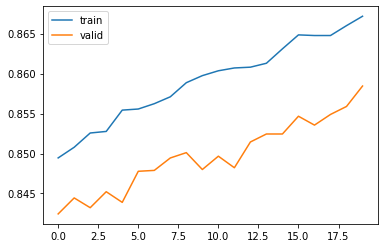

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
show_history(history)

In [57]:
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8477


[0.42475491762161255, 0.8476999998092651]